# **Hackathon 1 Retail Data Analytics**

---

# Section 2: Data Visualization

## Objectives

In Section 2, the aim is to anaylsis and present using 3 different plotting tools: Matpotlib, Seaborn and plotly to visualize the anaylsis and proof the hypothesis made. There will be a summary of findings and conclusion in the Section 3.


## Inputs

* A cleaned dataset prepared in Section 1 will be used. 
    *  [retail_cleaned.csv](../dataset/processed/retail_cleaned.csv)

## Outputs

* Findings with various graphs by Matpotlib, Seaborn and plotly will be demonstrated through this Jupyter Notebook. All the result will be summarized in README.md below.
    * [README.md](../README.md)

---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/denniskwok/Documents/data-analytics/hackathon1-retail-sales-data-analysis/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/Users/denniskwok/Documents/data-analytics/hackathon1-retail-sales-data-analysis'

---

# Part A 

# Matpotlib (basic static graphs)

* In Part A, Matplotlib is used to create basic charts analyzing sales performance by store, type, and size.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
# Load dataset from csv files
df = pd.read_csv("dataset/processed/retail_cleaned.csv")

In [6]:
# Convert 'Date' column to datetime since it's in object format after load
df['Date'] = pd.to_datetime(df['Date'])


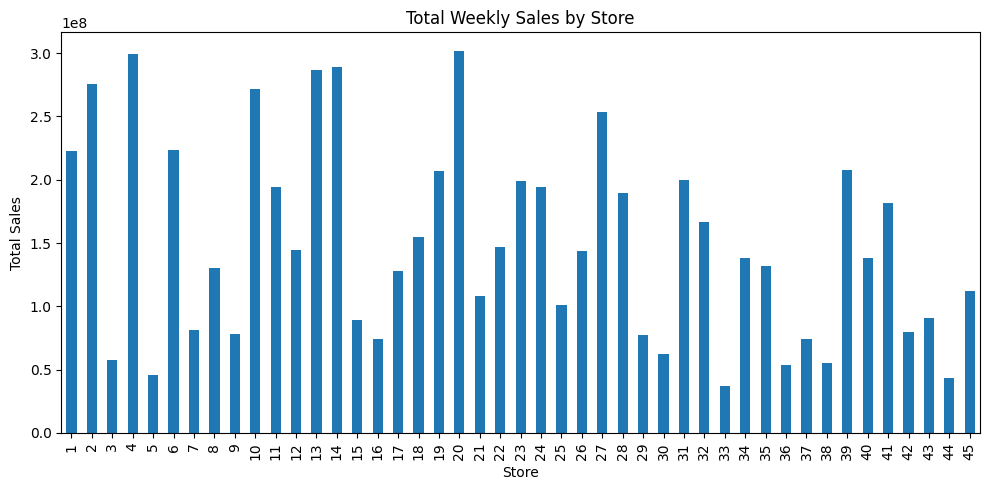

In [7]:
# 1. Total Weekly Sales by Store
df.groupby('Store')['Weekly_Sales'].sum().plot(kind='bar', figsize=(10,5))
plt.title('Total Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

In [8]:
# Top 5 sales stores
df_top_sales_store = (
    df.groupby('Store', as_index=False)['Weekly_Sales'].sum()                                         
      .sort_values(by='Weekly_Sales', ascending=False)
      .rename(columns={'Weekly_Sales': 'Total_Sales'})
)

df_top_sales_store.head(5)

,Store,Total_Sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08


**Findings:**
* By comparing accumulative sales across stores, the company can easily identify high- and low-performing stores, then adopt targeted marketing strategies to boost sales and reduce costs. Besides, the company can look deep into the low-performing stores with root cause analysis to guide the decisions on store expansion or closure.

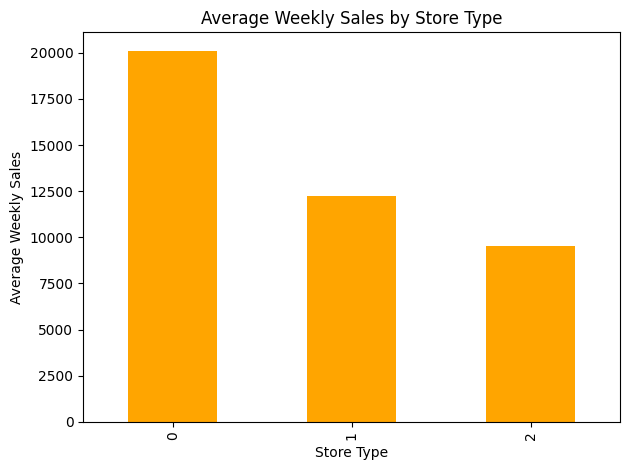

In [9]:
# 2. Average Sales by Store Type
if 'Type' in df.columns:
    df.groupby('Type')['Weekly_Sales'].mean().plot(kind='bar', color='orange')
    plt.title('Average Weekly Sales by Store Type')
    plt.xlabel('Store Type')
    plt.ylabel('Average Weekly Sales')
    plt.tight_layout()
    plt.show()

**Findings**
* With the comparison on store type, it shows the Store type 0:A (with ordinal encoder) with the highest average sales. The company should deploy more resource for Inventory of goods for store type A.

/Users/denniskwok/Documents/data-analytics/hackathon1-retail-sales-data-analysis/.venv/lib/python3.12/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


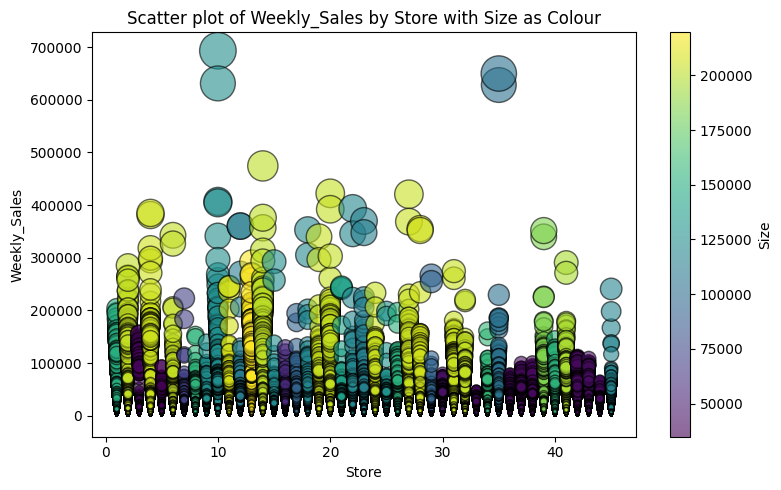

In [10]:
# 3. Scatter plot of Weekly Sales by Store with Size as Colour
x = 'Store'
y = 'Weekly_Sales'

plt.figure(figsize=(8,5))
plt.scatter( df[x], df[y], 
    c=df['Size'],         # color by Size column
    s=df[y] * 0.001,      # scale point size
    cmap='viridis',       # color map
    alpha=0.6,            # transparency
    edgecolor='black'
)

plt.xlabel(x)
plt.ylabel(y)
plt.title(f'Scatter plot of {y} by {x} with Size as Colour')
plt.colorbar(label='Size')
plt.tight_layout()
plt.show()

**Findings**
* Further investigating the correlation between the size of the store and the sales, it is clear that the larger store will contribute higher sales significantly. There are two store of medium size which acheived top weekly Sales among the stores. 
* The company can consider store expansion or more promotional sales for these two stores to boost the profit further regarding the potential demand.

---

# Part B

# Seaborn (advanced static graphs)

* In Part B, more complex static charts are created with Seaborn to analyze the seasonal and holiday effects on sales performance.

In [11]:
import seaborn as sns

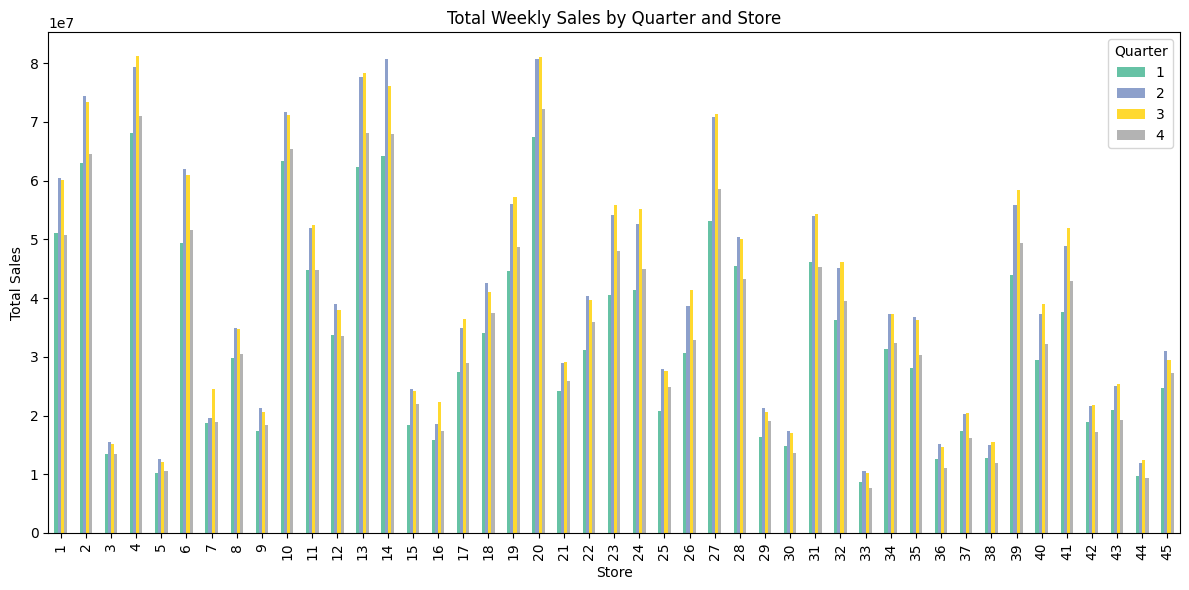

In [12]:
# 4. Bar Chart of total sales by quarter

df['Quarter'] = df['Date'].dt.quarter # Extract quarter from date
quarterly_sales = df.groupby(['Quarter', 'Store'])['Weekly_Sales'].sum().reset_index() # 
pivot_sales = quarterly_sales.pivot(index='Store', columns='Quarter', values='Weekly_Sales').fillna(0) # pivot table

# Plot grouped bar chart (set stacked=True for stacked bars)
pivot_sales.plot(kind='bar', stacked=False, figsize=(12,6), cmap='Set2')

plt.title('Total Weekly Sales by Quarter and Store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.legend(title='Quarter')
plt.tight_layout()
plt.show()

**Findings:**
* The bar chart reveals significant variation in total sales across stores and quarters. Certain stores consistently outperform others, and clear seasonal trends emerge, with quarters 3 and 4 showing notably higher sales. These patterns highlight both store-specific performance differences and the influence of seasonality on retail sales.

/Users/denniskwok/Documents/data-analytics/hackathon1-retail-sales-data-analysis/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/denniskwok/Documents/data-analytics/hackathon1-retail-sales-data-analysis/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


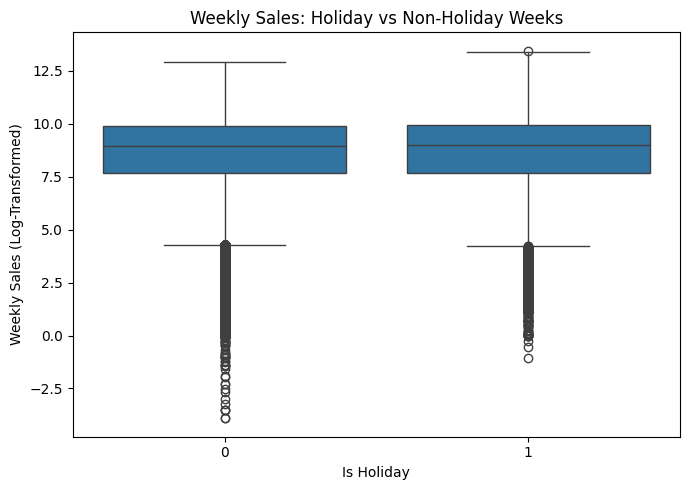

In [13]:
# 5.Boxplot: Weekly Sales during Holidays vs Non-Holidays with Log-Transformation
df['Weekly_Sales_log'] = np.log1p(df['Weekly_Sales']) # Log-transforming Weekly_Sales to reduce skewness and improve visualization
plt.figure(figsize=(7,5))
sns.boxplot(x='IsHoliday', y='Weekly_Sales_log', data=df)
plt.title('Weekly Sales: Holiday vs Non-Holiday Weeks')
plt.xlabel('Is Holiday')
plt.ylabel('Weekly Sales (Log-Transformed)')
plt.tight_layout()
plt.show()

**Findings:**

* The boxplot comparing log-transformed weekly sales during holiday and non-holiday weeks shows that holiday weeks generally have higher weekly sales compared to non-holiday weeks. The median sales are noticeably higher for holidays, and there is greater variability in sales during these periods. This suggests that holidays have a significant positive impact on weekly sales, with some weeks experiencing exceptionally high sales spikes.

/var/folders/qx/sssvngh16h16kvg986485h1r0000gn/T/ipykernel_29904/3452742865.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_data = df.groupby(f'{col}_bin')['Weekly_Sales'].mean().reset_index()
/var/folders/qx/sssvngh16h16kvg986485h1r0000gn/T/ipykernel_29904/3452742865.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


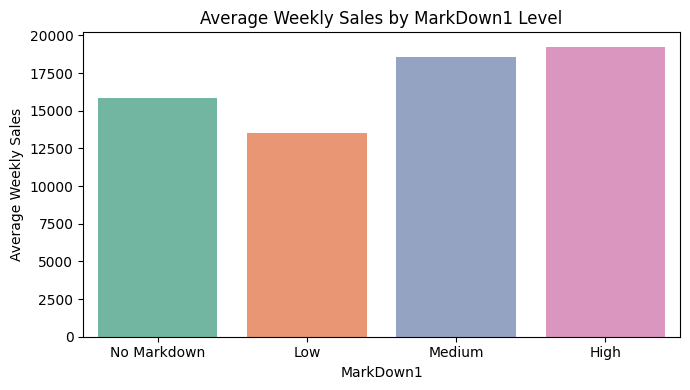

/var/folders/qx/sssvngh16h16kvg986485h1r0000gn/T/ipykernel_29904/3452742865.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_data = df.groupby(f'{col}_bin')['Weekly_Sales'].mean().reset_index()
/var/folders/qx/sssvngh16h16kvg986485h1r0000gn/T/ipykernel_29904/3452742865.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


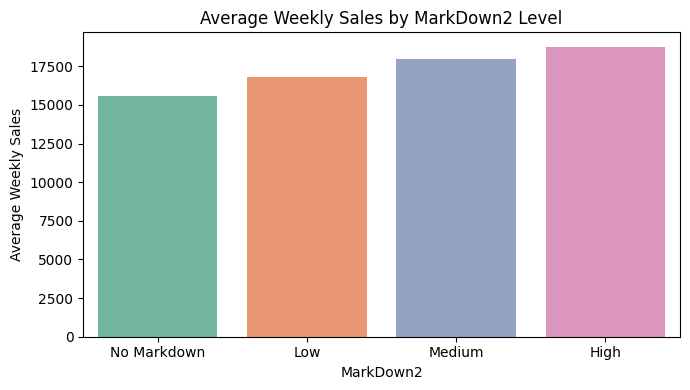

/var/folders/qx/sssvngh16h16kvg986485h1r0000gn/T/ipykernel_29904/3452742865.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_data = df.groupby(f'{col}_bin')['Weekly_Sales'].mean().reset_index()
/var/folders/qx/sssvngh16h16kvg986485h1r0000gn/T/ipykernel_29904/3452742865.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


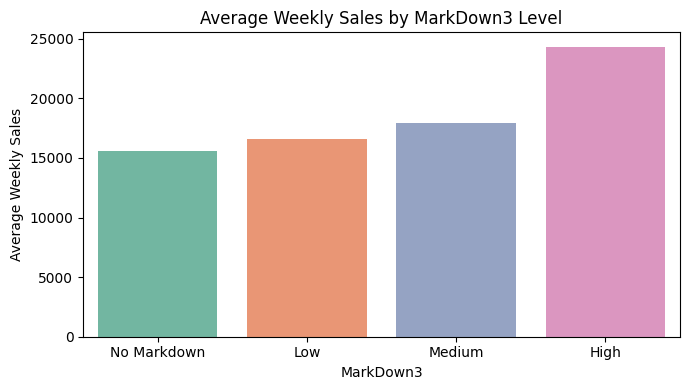

/var/folders/qx/sssvngh16h16kvg986485h1r0000gn/T/ipykernel_29904/3452742865.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_data = df.groupby(f'{col}_bin')['Weekly_Sales'].mean().reset_index()
/var/folders/qx/sssvngh16h16kvg986485h1r0000gn/T/ipykernel_29904/3452742865.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


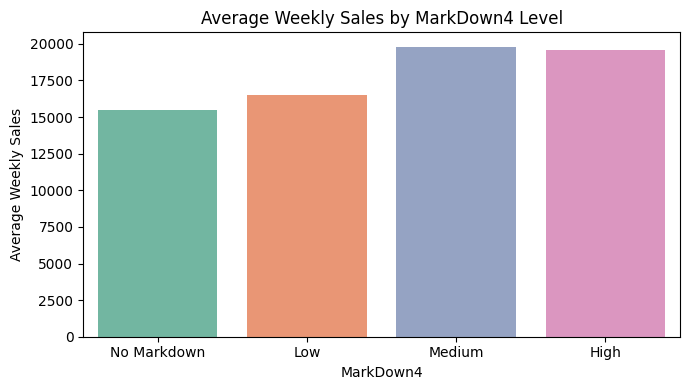

/var/folders/qx/sssvngh16h16kvg986485h1r0000gn/T/ipykernel_29904/3452742865.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_data = df.groupby(f'{col}_bin')['Weekly_Sales'].mean().reset_index()
/var/folders/qx/sssvngh16h16kvg986485h1r0000gn/T/ipykernel_29904/3452742865.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


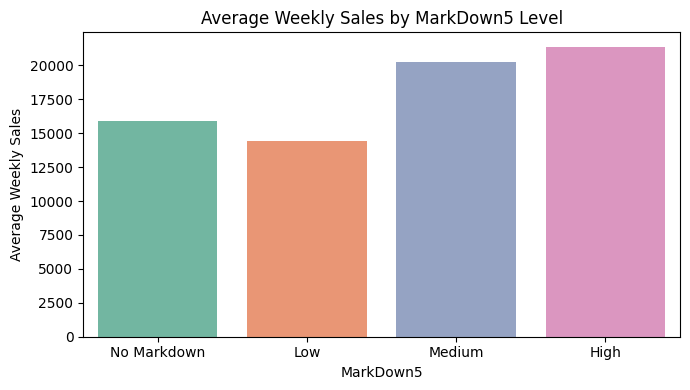


KeyboardInterrupt



In [21]:
# 6. Scatterplots of MarkDown features vs Weekly_Sales
markdown_cols = [col for col in df.columns if col.lower().startswith('markdown')] # Identify all Markdown columns

# Loop through each Markdown feature
for col in markdown_cols:
    # Bin Markdown values into categories (you can adjust bin edges)
    df[f'{col}_bin'] = pd.cut(
        df[col],
        bins=[-np.inf, 0, 5000, 20000, np.inf],
        labels=['No Markdown', 'Low', 'Medium', 'High']
    )
    
    # Aggregate weekly sales by binned Markdown
    pivot_data = df.groupby(f'{col}_bin')['Weekly_Sales'].mean().reset_index()
    
    # Plot bar chart of average weekly sales per bin
    plt.figure(figsize=(7,4))
    sns.barplot(
        data=pivot_data,
        x=f'{col}_bin',
        y='Weekly_Sales',
        palette='Set2'
    )
    plt.title(f'Average Weekly Sales by {col} Level')
    plt.xlabel(col)
    plt.ylabel('Average Weekly Sales')
    plt.tight_layout()
    plt.show()

**Findings:**
- The bar charts show that higher levels of MarkDown are associated with higher average weekly sales.
- Weeks with no markdown or low markdown have lower average sales compared to weeks with medium or high markdown.
- This suggests that larger markdowns can be effective in boosting weekly sales.
- The Markdown3 at high level appears to have the strongest positive effect on weekly sales, suggesting it could be prioritized in future promotional campaigns.

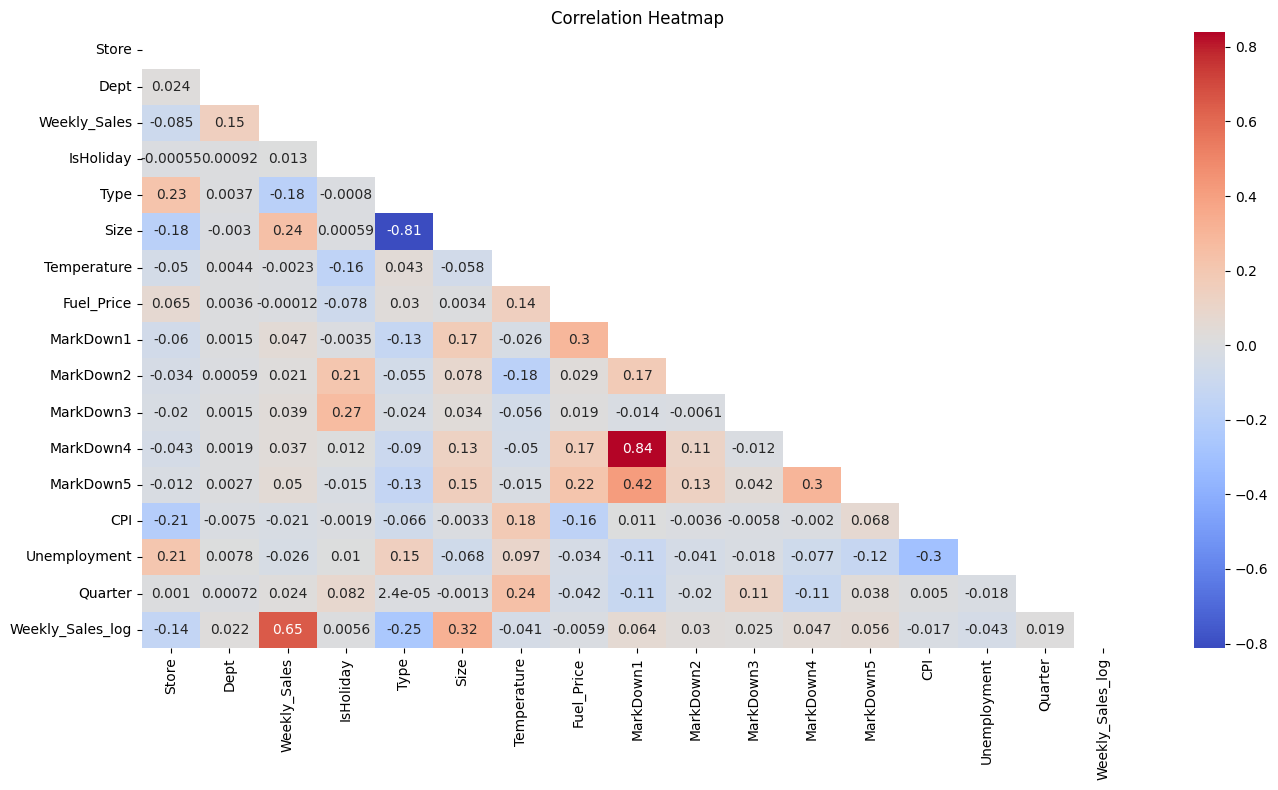

In [26]:
# 7. Correlation Heatmap of Numeric Features
corr = df.select_dtypes(include=[float, int]).corr() # Compute the correlation matrix
mask = np.triu(np.ones_like(corr, dtype=bool)) # Create a mask for duplicate values

plt.figure(figsize=(14,8))
sns.heatmap(df.select_dtypes(include=[float, int]).corr(), mask=mask, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

**Findings:**
- The correlation heatmap shows that most numeric features have weak or no correlation with weekly sales.
- Store size and type have the strongest positive correlations with sales, while MarkDown features show only slight positive relationships.
- Macroeconomic variables like fuel price, CPI, and unemployment have little to no impact on weekly sales in this dataset.
- This suggests that store characteristics and markdowns are more important drivers of sales than external economic factors.

---

# Part C

In [16]:
# plotly (advance interactive graphs)

---

In [ ]:
# Install necessary packages and restart the kernel if needed
!pip install nbformat

In [18]:
import plotly.express as px
import plotly.io as pio

---

## Brief Summary of Findings
- Stores show significant variation in total and average weekly sales, with some stores and store types consistently outperforming others.
- Larger stores tend to achieve higher weekly sales, but a few medium-sized stores also perform exceptionally well.
- Sales are noticeably higher during holiday weeks, with greater variability and occasional sales spikes.
- Sales patterns also vary by quarter, indicating possible seasonality in consumer behavior.
- These insights can help guide inventory planning, marketing strategies, and decisions on store expansion or closure.

# Section 3 : Conclusions and next steps